# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [2]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from exercise_code.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `exercise_code/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
  np.random.seed(0)
  return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
  np.random.seed(1)
  X = 10 * np.random.randn(num_inputs, input_size)
  y = np.array([0, 1, 2, 2, 1])
  return X, y

net = init_toy_model()
X, y = init_toy_data()
W1, b1 = net.params['W1'], net.params['b1']
W2, b2 = net.params['W2'], net.params['b2']
N, _ = X.shape
print(" W1 = {0},\n W2 = {1},\n b1 = {2},\n b2 = {3},\n X = {4},\n y = {5}\n".format(W1.shape, W2.shape, b1.shape, b2.shape, X.shape, y.shape))

 W1 = (4, 10),
 W2 = (10, 3),
 b1 = (10,),
 b2 = (3,),
 X = (5, 4),
 y = (5,)



# Forward pass: compute scores
Open the file `exercise_code/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the Softmax exercise: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs. Please first read the class description in the file, in particular note that for this exercise we use ReLU non-linearities.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.680272093239262e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7963408538435033e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from exercise_code.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.1)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))
#print(grads)

W1 max relative error: 4.327899e-09
W2 max relative error: 3.440708e-09
b1 max relative error: 1.555470e-09
b2 max relative error: 3.865028e-11


# Train a Toy Network
To train the network we will use stochastic gradient descent (SGD), similar to the Softmax classifier. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the Softmax classifier. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.01716154557763027


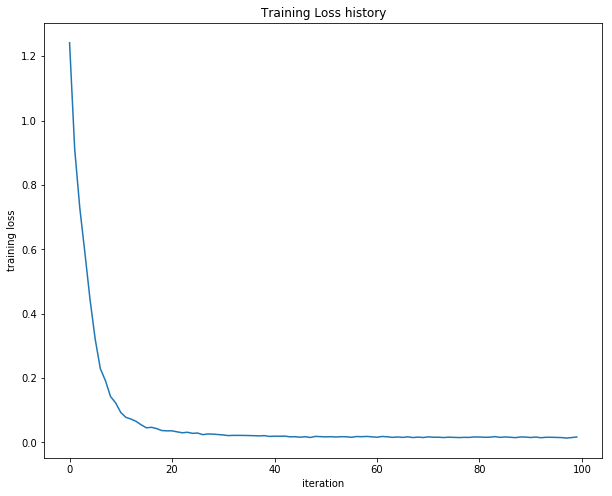

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=1e-5,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

Train data shape:  (48000, 3072)
Train labels shape:  (48000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)
dev data shape:  (500, 3072)
dev labels shape:  (500,)


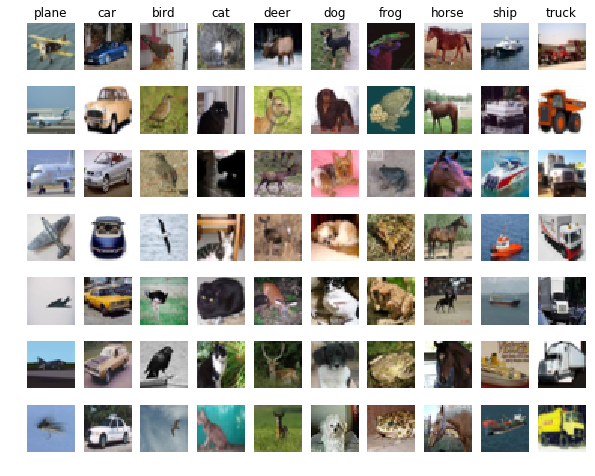

In [3]:
from exercise_code.data_utils import load_CIFAR10
from exercise_code.vis_utils import visualize_cifar10

def get_CIFAR10_data(num_training=48000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. 
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'datasets/'
    X, y = load_CIFAR10(cifar10_dir)
    

    # Our training set will be the first num_train points from the original
    # training set.
    mask = range(num_training)
    X_train = X[mask]
    y_train = y[mask]
    
    
    # Our validation set will be num_validation points from the original
    # training set.
    mask = range(num_training, num_training + num_validation)
    X_val = X[mask]
    y_val = y[mask]
    
    # We use a small subset of the training set as our test set.
    mask = range(num_training + num_validation, num_training + num_validation + num_test)
    X_test = X[mask]
    y_test = y[mask]
    
    # We will also make a development set, which is a small subset of
    # the training set. This way the development cycle is faster.
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

    return X, y, X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_raw, y_raw, X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev= get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

# visualize raw data
visualize_cifar10(X_raw, y_raw)

# Train a Network
As before, we will use SGD to train our network. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [35]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.303348
iteration 100 / 1000: loss 1.824685
iteration 200 / 1000: loss 1.696069
iteration 300 / 1000: loss 1.789473
iteration 400 / 1000: loss 1.728484
iteration 500 / 1000: loss 1.657448
iteration 600 / 1000: loss 1.643277
iteration 700 / 1000: loss 1.703794
iteration 800 / 1000: loss 1.778110
iteration 900 / 1000: loss 1.694002
Validation accuracy:  0.467


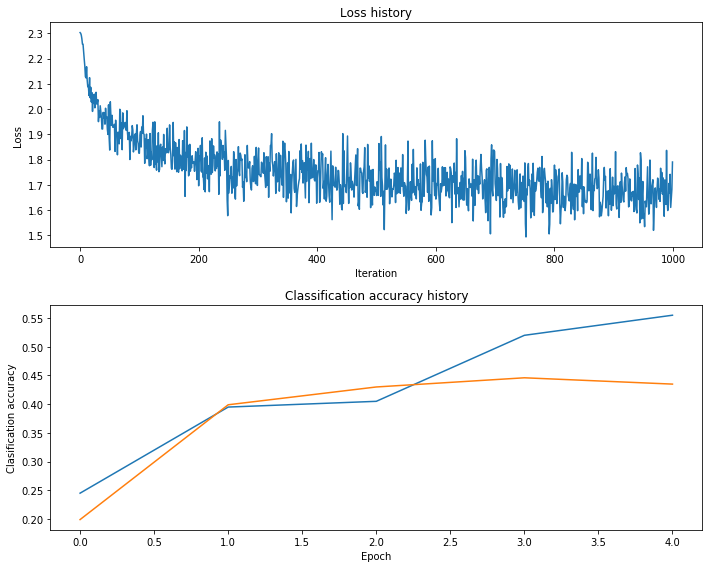

In [36]:
# Plot the loss function and train / validation accuracies
plt.subplots(nrows=2, ncols=1)

plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')

plt.tight_layout()
plt.show()

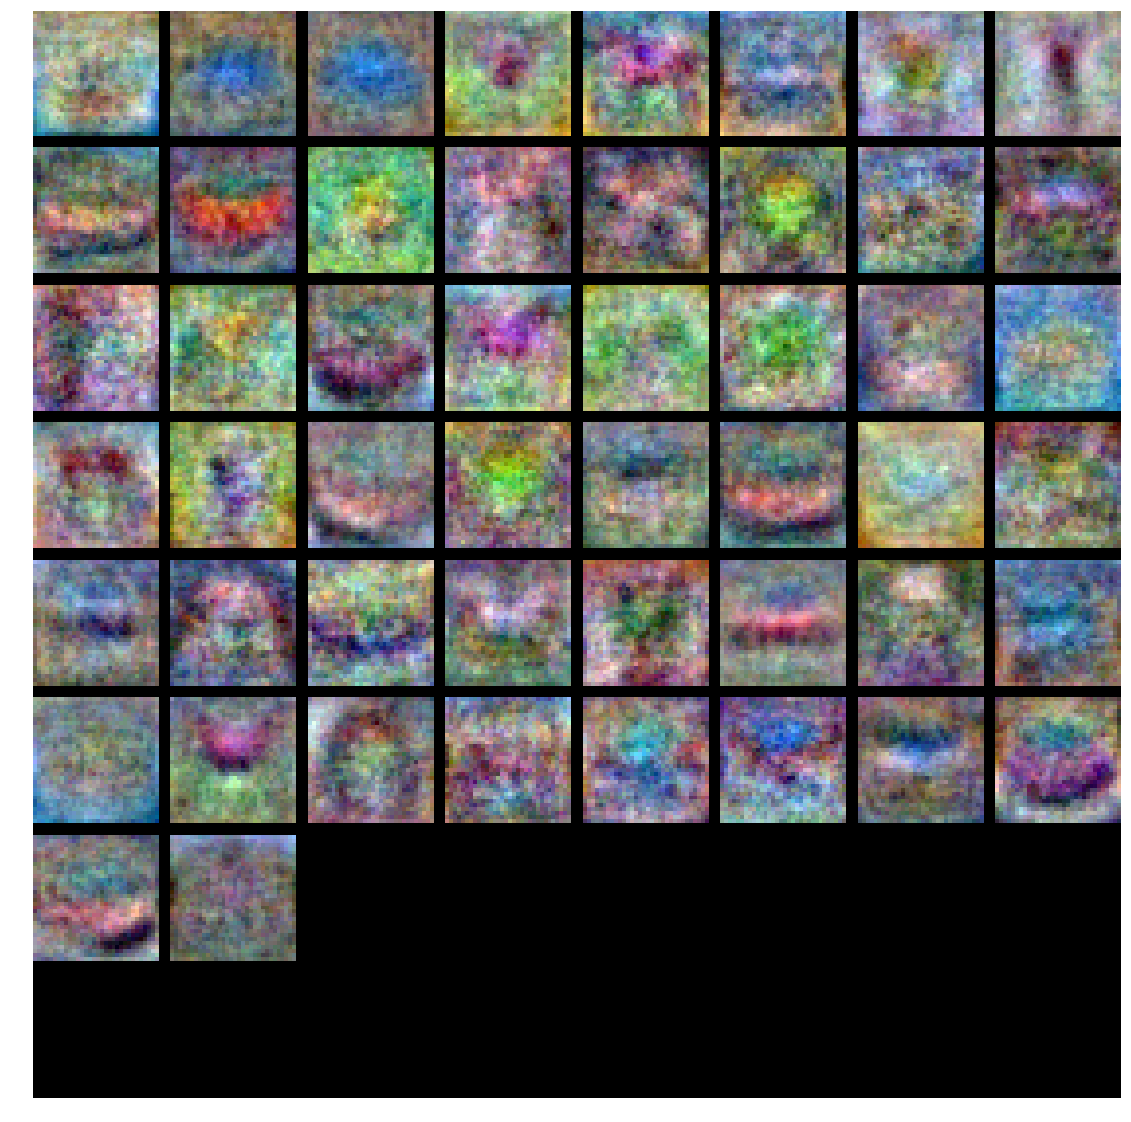

In [37]:
from exercise_code.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    fig = plt.figure(figsize=(20,20))
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should aim to achieve a classification accuracy of greater than 48% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).


**We highly encourage you to use this opportunity to get a feel for your machine learning system. Consider this kind of tuning as an essential part of getting the most out of your neural network**

In [49]:
from exercise_code.classifiers.neural_net import TwoLayerNet, neuralnetwork_hyperparameter_tuning

best_net = neuralnetwork_hyperparameter_tuning(X_train, y_train, X_val, y_val)

0.0001 0.1 15000 300
iteration 0 / 15000: loss 2.303518
iteration 100 / 15000: loss 1.722745
iteration 200 / 15000: loss 1.759334
iteration 300 / 15000: loss 1.550075
iteration 400 / 15000: loss 1.621342
iteration 500 / 15000: loss 1.620062
iteration 600 / 15000: loss 1.466212
iteration 700 / 15000: loss 1.641989
iteration 800 / 15000: loss 1.446569
iteration 900 / 15000: loss 1.460719
iteration 1000 / 15000: loss 1.705086
iteration 1100 / 15000: loss 1.652402
iteration 1200 / 15000: loss 1.498223
iteration 1300 / 15000: loss 1.485305
iteration 1400 / 15000: loss 1.511933
iteration 1500 / 15000: loss 1.430714
iteration 1600 / 15000: loss 1.421161
iteration 1700 / 15000: loss 1.415283
iteration 1800 / 15000: loss 1.642163
iteration 1900 / 15000: loss 1.417056
iteration 2000 / 15000: loss 1.483104
iteration 2100 / 15000: loss 1.396301
iteration 2200 / 15000: loss 1.473610
iteration 2300 / 15000: loss 1.461338
iteration 2400 / 15000: loss 1.476882
iteration 2500 / 15000: loss 1.519846
ite

In [ ]:
#from exercise_code.classifiers.neural_net import TwoLayerNet, neuralnetwork_hyperparameter_tuning

#best_net = neuralnetwork_hyperparameter_tuning(X_train, y_train, X_val, y_val)
"""mybest = None
for net in neuralnetwork_hyperparameter_tuning(X_train, y_train, X_val, y_val):
    print(net)
    mybest = net
"""
#if yield


input_size = 32 * 32 * 3
hidden_size = 300
num_classes = 10
net_greece = TwoLayerNet(input_size, 300, num_classes)

# Train the network
stats = net_greece.train(X_train, y_train, X_val, y_val,
            num_iters=15000, batch_size=200,
            learning_rate=0.0001, learning_rate_decay=0.95,
            reg=0.1, verbose=True)

# Predict on the validation set
val_acc = (net_greece.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

test_acc = (net_greece.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

iteration 0 / 15000: loss 2.303518
iteration 100 / 15000: loss 1.674120
iteration 200 / 15000: loss 1.551357
iteration 300 / 15000: loss 1.604733
iteration 400 / 15000: loss 1.595342
iteration 500 / 15000: loss 1.459288
iteration 600 / 15000: loss 1.610834
iteration 700 / 15000: loss 1.630667
iteration 800 / 15000: loss 1.438933
iteration 900 / 15000: loss 1.758762
iteration 1000 / 15000: loss 1.563332
iteration 1100 / 15000: loss 1.660959
iteration 1200 / 15000: loss 1.487001
iteration 1300 / 15000: loss 1.495333
iteration 1400 / 15000: loss 1.657915
iteration 1500 / 15000: loss 1.542499
iteration 1600 / 15000: loss 1.533382
iteration 1700 / 15000: loss 1.511026
iteration 1800 / 15000: loss 1.597587
iteration 1900 / 15000: loss 1.628009
iteration 2000 / 15000: loss 1.447868
iteration 2100 / 15000: loss 1.620553
iteration 2200 / 15000: loss 1.482585
iteration 2300 / 15000: loss 1.402208
iteration 2400 / 15000: loss 1.487115
iteration 2500 / 15000: loss 1.475339
iteration 2600 / 15000: loss 1.472246
iteration 2700 / 15000: loss 1.447743
iteration 2800 / 15000: loss 1.402517
iteration 2900 / 15000: loss 1.506424
iteration 3000 / 15000: loss 1.315045
iteration 3100 / 15000: loss 1.310525
iteration 3200 / 15000: loss 1.292012
iteration 3300 / 15000: loss 1.390128
iteration 3400 / 15000: loss 1.379758
iteration 3500 / 15000: loss 1.347575
iteration 3600 / 15000: loss 1.253206
iteration 3700 / 15000: loss 1.434264
iteration 3800 / 15000: loss 1.355740
iteration 3900 / 15000: loss 1.296068
iteration 4000 / 15000: loss 1.149893
iteration 4100 / 15000: loss 1.199121
iteration 4200 / 15000: loss 1.218146
iteration 4300 / 15000: loss 1.398036
iteration 4400 / 15000: loss 1.454708
iteration 4500 / 15000: loss 1.509462
iteration 4600 / 15000: loss 1.355105
iteration 4700 / 15000: loss 1.248691
iteration 4800 / 15000: loss 1.332755
iteration 4900 / 15000: loss 1.191704
iteration 5000 / 15000: loss 1.253673
iteration 5100 / 15000: loss 1.331470
iteration 5200 / 15000: loss 1.338289
iteration 5300 / 15000: loss 1.379226
iteration 5400 / 15000: loss 1.312141
iteration 5500 / 15000: loss 1.202154
iteration 5600 / 15000: loss 1.243653
iteration 5700 / 15000: loss 1.220977
iteration 5800 / 15000: loss 1.199486
iteration 5900 / 15000: loss 1.232484
iteration 6000 / 15000: loss 1.252627
iteration 6100 / 15000: loss 1.167798
iteration 6200 / 15000: loss 1.265690
iteration 6300 / 15000: loss 1.180401
iteration 6400 / 15000: loss 1.167383
iteration 6500 / 15000: loss 1.292065
iteration 6600 / 15000: loss 1.124209
iteration 6700 / 15000: loss 1.130273
iteration 6800 / 15000: loss 1.061481
iteration 6900 / 15000: loss 1.102542
iteration 7000 / 15000: loss 1.292603
iteration 7100 / 15000: loss 1.086543
iteration 7200 / 15000: loss 1.137556
iteration 7300 / 15000: loss 1.140137
iteration 7400 / 15000: loss 1.238434
iteration 7500 / 15000: loss 1.119420
iteration 7600 / 15000: loss 1.054875
iteration 7700 / 15000: loss 1.088366
iteration 7800 / 15000: loss 1.095988
iteration 7900 / 15000: loss 1.154160
iteration 8000 / 15000: loss 1.149588
iteration 8100 / 15000: loss 1.155921
iteration 8200 / 15000: loss 1.104679
iteration 8300 / 15000: loss 1.177611
iteration 8400 / 15000: loss 1.132371
iteration 8500 / 15000: loss 1.094230
iteration 8600 / 15000: loss 1.158485
iteration 8700 / 15000: loss 1.170653
iteration 8800 / 15000: loss 1.130355
iteration 8900 / 15000: loss 1.137169
iteration 9000 / 15000: loss 1.051002
iteration 9100 / 15000: loss 1.025585
iteration 9200 / 15000: loss 1.063929
iteration 9300 / 15000: loss 1.103212
iteration 9400 / 15000: loss 0.998715
iteration 9500 / 15000: loss 1.031610
iteration 9600 / 15000: loss 1.050860
iteration 9700 / 15000: loss 0.909562
iteration 9800 / 15000: loss 1.057333
iteration 9900 / 15000: loss 1.012057
iteration 10000 / 15000: loss 1.150634
iteration 10100 / 15000: loss 0.972005
iteration 10200 / 15000: loss 0.981495
iteration 10300 / 15000: loss 1.020448
iteration 10400 / 15000: loss 1.136145
iteration 10500 / 15000: loss 1.030815
iteration 10600 / 15000: loss 1.105567
iteration 10700 / 15000: loss 0.967013
iteration 10800 / 15000: loss 1.088775
iteration 10900 / 15000: loss 0.945594
iteration 11000 / 15000: loss 1.013979
iteration 11100 / 15000: loss 1.009658
iteration 11200 / 15000: loss 0.976094
iteration 11300 / 15000: loss 1.070917
iteration 11400 / 15000: loss 0.989923
iteration 11500 / 15000: loss 1.114769
iteration 11600 / 15000: loss 1.014783
iteration 11700 / 15000: loss 0.982081
iteration 11800 / 15000: loss 0.980047
iteration 11900 / 15000: loss 0.982794
iteration 12000 / 15000: loss 0.886331
iteration 12100 / 15000: loss 1.046127
iteration 12200 / 15000: loss 0.926343
iteration 12300 / 15000: loss 0.900435
iteration 12400 / 15000: loss 0.983984
iteration 12500 / 15000: loss 0.875530
iteration 12600 / 15000: loss 0.877414
iteration 12700 / 15000: loss 0.940969
iteration 12800 / 15000: loss 0.917531
iteration 12900 / 15000: loss 0.987883
iteration 13000 / 15000: loss 0.985027
iteration 13100 / 15000: loss 0.973470
iteration 13200 / 15000: loss 1.091165
iteration 13300 / 15000: loss 0.929732
iteration 13400 / 15000: loss 0.935477
iteration 13500 / 15000: loss 1.018481
iteration 13600 / 15000: loss 0.941475
iteration 13700 / 15000: loss 0.981865
iteration 13800 / 15000: loss 0.827002
iteration 13900 / 15000: loss 0.945924
iteration 14000 / 15000: loss 0.891208
iteration 14100 / 15000: loss 0.963994
iteration 14200 / 15000: loss 0.900855
iteration 14300 / 15000: loss 0.889946
iteration 14400 / 15000: loss 0.972458
iteration 14500 / 15000: loss 0.912108
iteration 14600 / 15000: loss 0.891975
iteration 14700 / 15000: loss 0.940594
iteration 14800 / 15000: loss 1.032159
iteration 14900 / 15000: loss 1.006183
Validation accuracy:  0.55
Test accuracy:  0.547


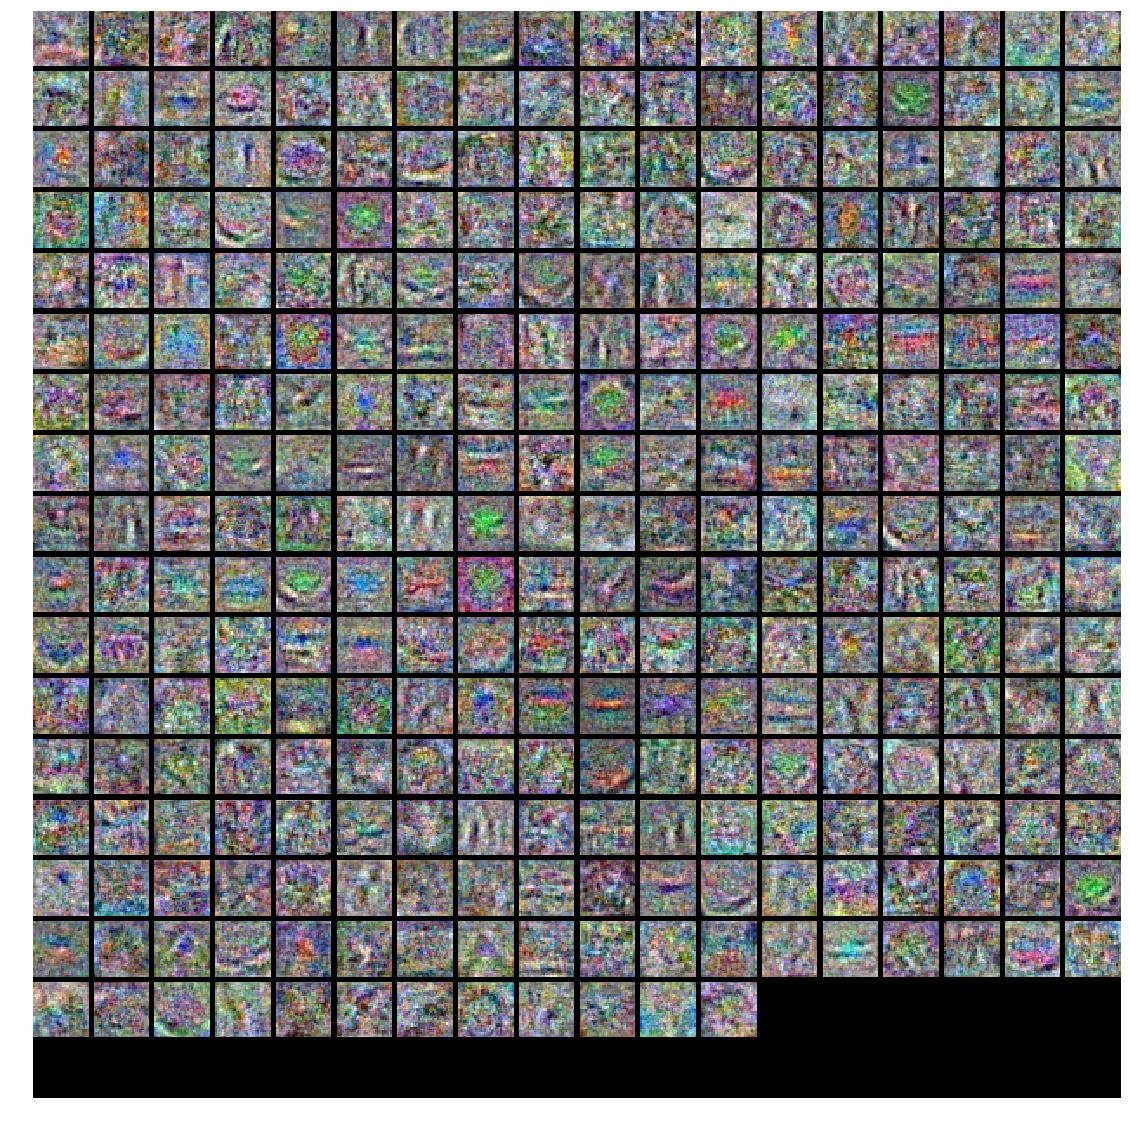

In [52]:
#best_net = my
# visualize the weights of the best network
#show_net_weights(net_greece)
show_net_weights(best_net)

<div class="alert alert-info">
    <h3>Inline Question</h3>
    <p>Describe what your visualized two-layer-net weights look like, in particular in contrast to the softmax weights of the first exercise of this set.</p>
    <p> New weights have more vivid shape, comparing to softmax weights. In some pictures one can see smoothed lines of the given picture, e.g. a horse or a frog. Also there are more pixturuse, because we used more nodes in the hidden layer</p>
</div>

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 50%.

In [54]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.563


## Save the model

When you are satisfied with your training, save the model for submission. You need to score higher than __50__ to pass this exercise.

In [56]:
from exercise_code.model_savers import save_two_layer_net
save_two_layer_net(best_net)
#save_two_layer_net(best_net_my2)

In [267]:
print(best_net2)

In [268]:
print(best_net)